ABSTRACT

In this notebook, I attempt to explore the responses redditors have to different relationship issues: in particular to those of men vs women, cheating vs abuse, and the subjectivity and sentiment therein. The purpose of this is (1) to determine how people respond based on their implicit biases, (2) how redditors affect the culture on their website and (3) to provide recommendations to the administration on how to limit unwanted effects.

(1) Despite popular belief, no particular differences were found between comments in response to men or women. While this does not mean individuals cannot be biased, it appears that those biases cancel one another out.

(2) It is well-documented that redditors lack nuance in their approach to relationships -- they respond similarly to several different types of issue someone may have with their partner. One does not need to be a Data Scientist to encourage those experiencing relationship difficulties to confer with friends, seek out a therapist, or read the literature rather than to consult strangers on the internet.

(3) One possible recommendation would have been to do away with people announcing their gender/age in the post, however this does not appear to be necessary.

In [14]:
import json
import praw
import warnings
warnings.filterwarnings('ignore')

f=json.load(open('reddit_api.json'))

reddit = praw.Reddit(client_id=f[0]['username'], \
                     client_secret=f[1]['key'], \
                     user_agent=f[2]['appname'], \
                     username=f[2]['appname'], \
                     password=f[3]['password'])

#Setting up the reddit API without giving away my passwords

In [15]:
#Obtaining the data

Mega=reddit.subreddit('AmITheAsshole+relationships')

d={x:[] for x in ['code','title','body','score']}
for submission in Mega.top(limit=2000):
    d['code'].append(submission.id)
    d['title'].append(submission.title)
    d['body'].append(submission.selftext)
    d['score'].append(submission.score)

In [16]:
import pandas as pd
import numpy as np

df=pd.DataFrame(d,columns=['code','title','body','score'])

df.head()

,code,title,body,score
0,d6xoro,META: This sub is moving towards a value syste...,I’ve enjoyed reading and posting on this sub f...,80920
1,azvko1,"UPDATE, AITA for despising my mentally handica...","I'm back like I said I would be,. My [original...",72779
2,gr8bp3,AITA For suing my girlfriend after she had my ...,I'll try to keep this short. I had a [1967 Imp...,69352
3,cjetsa,UPDATE: AITA for wanting to go to the funeral ...,I want to sincerely thank everyone who comment...,67575
4,e5k3z2,AITA for pretending to get fired when customer...,I am a high schooler with a weekend job at a c...,63533


In [13]:
df.tail()

,code,title,body,score
1818,5uowwb,UPDATE:Coworker [25F] thinks we [22F] [20 - 30...,Previous post [here] (https://www.reddit.com/r...,1899
1819,1rqjs0,(UPDATE-2) I'm a waitress and I (F24) have a H...,[Previous Post](http://www.reddit.com/r/relati...,1889
1820,18om8d,My(14m) mom(30f)is remarrying and there isn't ...,"He lives in Texas and we live in Virginia, so ...",1891
1821,fwiud6,BF (26 M) accuses me of getting mad because he...,"Hi all,\n\nIt is currently the third week of q...",1876
1822,hdg0az,UPDATE - My wife’s mental illness has devastat...,Original post:\n\nhttps://www.reddit.com/r/rel...,1310


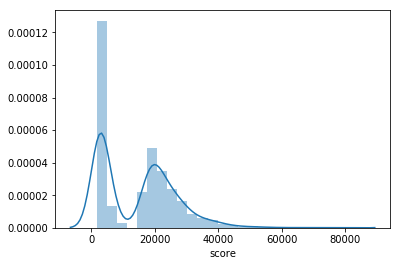

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df.score)
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 4 columns):
code     1823 non-null object
title    1823 non-null object
body     1823 non-null object
score    1823 non-null int64
dtypes: int64(1), object(3)
memory usage: 57.1+ KB


In [12]:
df.describe()

,score
count,1823.000000
mean,14515.837082
std,11816.507793
min,1310.000000
25%,2874.000000
50%,16912.000000
75%,22231.500000
max,80917.000000


In [18]:
#Assign male/female to the poster. This does not have to be perfect, it just needs to be as smart as the average redditor
import re

Mpattern=re.compile('((i)|(I)|(me)|(Me)|(My)|(my))(\s?)(\[|\(|\{)(m|M|(\d\dm)|(\d\dM))')
Fpattern=re.compile('((i)|(I)|(me)|(Me)|(My)|(my))(\s?)(\[|\(|\{)(f|F|(\d\df)|(\d\dF))')
Mrelationships=re.compile('((wife)|(girlfriend)|(Wife)|(Girlfriend)|(gf)|(Gf)|(GF))')
Frelationships=re.compile('((husband)|(boyfriend)|(Husband)|(Boyfriend)|(bf)|(Bf)|(BF))')


Gender=[]

for idx in df.index:
    if Mpattern.search(df.title[idx])  or Mpattern.search(df.body[idx]) : 
        Gender.append('M')
    elif Fpattern.search(df.title[idx]) or Fpattern.search(df.body[idx]): 
        Gender.append("F")
    elif Mrelationships.search(df.title[idx]):
        Gender.append('M')
    elif Frelationships.search(df.title[idx]):
        Gender.append('F')   
    else:
        Gender.append(0)

df['Gender']=Gender
df.Gender.value_counts()

0    719
F    660
M    441
Name: Gender, dtype: int64

0.5974614687216682


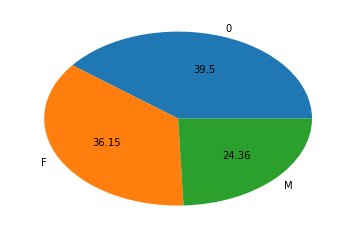

In [44]:
print(659/(659+444)) #More women appear than men. Odd, usually its men who are associated with reddit usage.



# def absolute_value(val):
#     a  = numpy.round(val/100.*sizes.sum(), 0)
#     return a

plt.pie(df.Gender.value_counts(),labels=df.Gender.value_counts().index,autopct=lambda x: np.round(x,2))
plt.show()

In [19]:
for i in range(25):
    print(df.Gender[i])
    print(df.title[i])
    print(df.body[i])
    print('######')
    
#The Gender assignments look fairly accurate

0
META: This sub is moving towards a value system that frequently doesn't align with the rest of the world
I’ve enjoyed reading and posting on this sub for many months now, and I feel like I’ve noticed a disconcerting trend, lately. Over time, more and more of the posts seem to have A- a universal consensus on every post, with any dissenters massively downvoted and B- a shift towards judgments that seem (to me at least) to be out of step with how people in the real world judge situations.

Given that, I think it’s important to remember that even though the sub is not intended to be for validation posts or to be an echo chamber or to give advice on how people should behave in specific situations- in practice, a lot of times it is.

So just as a reminder- offline, people in your real life will think you’re an asshole if you take the last cookie when you know the child behind you wants it.

They’ll think you’re an asshole if you don’t stand up for an elderly person on a bus. They’ll think

In [10]:
import pickle

with open('reddit_data.pickle', 'wb') as f:
    pickle.dump(df, f, pickle.HIGHEST_PROTOCOL)
    


In [19]:
from praw.models import MoreComments

df2=df[df.Gender!=0]

#Scrape the data

#Create a dataframe of responses to the original posts

Responses=[]

for idx in df.index:
    code=df.code[idx]
    submission=reddit.submission(id=code)
    submission.comment_sort='best'
    submission.comment_limit=10
    for comment in submission.comments:
        if isinstance(comment, MoreComments): continue
        elif comment.stickied: continue
        elif comment.body=='[deleted]': continue
        elif comment.body=='[removed]': continue
        else:
            Responses.append((code,comment.body,df.Gender[idx]))
            


In [20]:
Response_df=pd.DataFrame(Responses,columns=['Code','Response','Gender'])

with open('response_data.pickle', 'wb') as f:
    pickle.dump(Response_df, f, pickle.HIGHEST_PROTOCOL)

Response_df.head()

Response_df.Gender.value_counts()

print(2931/(2931+1844))

#Why are women getting so many more responses? Must get rid of some female responders to counterbalance

0.6138219895287959


In [21]:
Response_df_F=Response_df[Response_df.Gender=="F"]
Response_df_M=Response_df[Response_df.Gender=="M"]

Response_df_F=Response_df_F.sample(1844)

Resampled_df=pd.concat([Response_df_F,Response_df_M],axis=0)
Resampled_df.head()

,Code,Response,Gender
2971,f7st04,"NTA if her argument is ""babysitters should res...",F
6623,5lms23,"Thanks for all of your advice, everyone. I thi...",F
1698,h8aqon,I mean NTA for trying to help but if your sist...,F
6606,4gz43u,Great job OP! And I feel reasonably confident...,F
5982,8vif0o,"I bet she's cheating, but not with your husban...",F


In [48]:
Resampled_df.Gender.value_counts()

F    1844
M    1844
Name: Gender, dtype: int64

In [52]:
sum(Resampled_df.Response.value_counts()!=1) # we good

0

In [22]:
def word_count(text):
    return len(text.split())

Resampled_df['Length']=list(map(word_count,Resampled_df.Response))
Resampled_df.head()

,Code,Response,Gender,Length
2971,f7st04,"NTA if her argument is ""babysitters should res...",F,50
6623,5lms23,"Thanks for all of your advice, everyone. I thi...",F,115
1698,h8aqon,I mean NTA for trying to help but if your sist...,F,37
6606,4gz43u,Great job OP! And I feel reasonably confident...,F,17
5982,8vif0o,"I bet she's cheating, but not with your husban...",F,69


In [75]:
Resampled_df.describe()

,Length
count,3688.000000
mean,76.254881
std,87.604912
min,1.000000
25%,25.000000
50%,51.000000
75%,95.000000
max,1232.000000


Gender Mean St dev
Male:  78.43528126706718 92.04010974975648
Female:  73.029284164859 79.67477418451266
Ttest_indResult(statistic=1.9035425085286954, pvalue=0.057047882266454096)


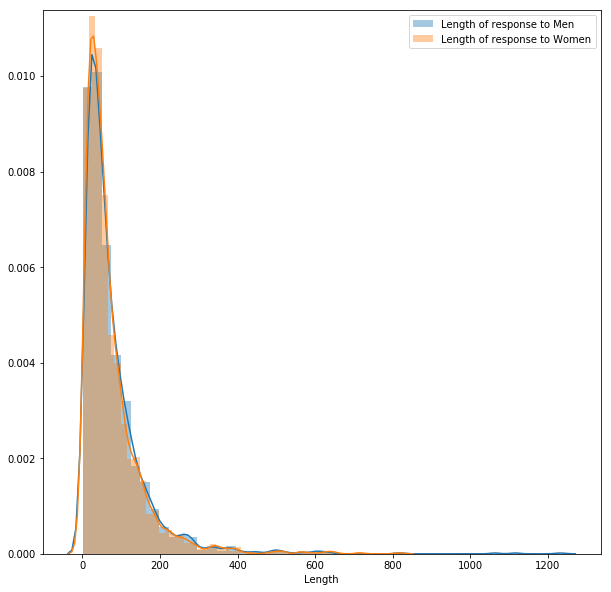

In [23]:
import scipy.stats as st 

M_Length=Resampled_df[Resampled_df.Gender=='M'].Length
F_Length=Resampled_df[Resampled_df.Gender=='F'].Length

print("Gender","Mean","St dev")
print("Male: ",np.mean(M_Length),np.std(M_Length))
print("Female: ",np.mean(F_Length),np.std(F_Length))

print(st.ttest_ind(M_Length,F_Length))


plt.figure(figsize=(10,10))
sns.distplot(M_Length,label="Length of response to Men")
sns.distplot(F_Length,label="Length of response to Women")
plt.legend()
plt.show() 

#Men get significantly consistently more words in their 
#responses than women, even though they had fewer responders overall

In [85]:
sum(Resampled_df.Length<10)/(len(Resampled_df.index)) #Only 5% of responses have fewer than 10 words

0.048264642082429504

In [24]:
from nltk.corpus import stopwords
import string
import nltk

stopwords_list = stopwords.words('english')

stopwords_list += list(string.punctuation)

stopwords_list+=["'",'"',"'s","n't",'’','’',"'re","''",'``',"'m"]



In [25]:
from nltk import word_tokenize

def clean_text(article):
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed  

Resampled_df['Cleaned']=list(map(clean_text,Resampled_df['Response']))
Resampled_df.head()

,Code,Response,Gender,Length,Cleaned
2971,f7st04,"NTA if her argument is ""babysitters should res...",F,50,"[nta, argument, babysitters, respect, rules, e..."
6623,5lms23,"Thanks for all of your advice, everyone. I thi...",F,115,"[thanks, advice, everyone, think, give, anothe..."
1698,h8aqon,I mean NTA for trying to help but if your sist...,F,37,"[mean, nta, trying, help, sister, deeply, delu..."
6606,4gz43u,Great job OP! And I feel reasonably confident...,F,17,"[great, job, op, feel, reasonably, confident, ..."
5982,8vif0o,"I bet she's cheating, but not with your husban...",F,69,"[bet, cheating, husband, probably, assumes, hu..."


In [26]:
vocab_M=set()
vocab_F=set()
for idx in Resampled_df.index:
    if Resampled_df['Gender'][idx]=="F": vocab_F.update(Resampled_df['Cleaned'][idx])
    elif Resampled_df['Gender'][idx]=="M": vocab_M.update(Resampled_df['Cleaned'][idx])

print(len(vocab_M),len(vocab_F))

vocab=vocab_M.union(vocab_F)


8629 8512


In [27]:
from nltk import FreqDist

Text_M=[]
Text_F=[]

for idx in Resampled_df.index:
    if Resampled_df['Gender'][idx]=="F": Text_F+=Resampled_df['Cleaned'][idx]
    elif Resampled_df['Gender'][idx]=="M": Text_M+=Resampled_df['Cleaned'][idx]
    
FreqDist_M=FreqDist(Text_M)
FreqDist_F=FreqDist(Text_F)

print("Male","Female")
for pair in zip([x[0] for x in FreqDist_M.most_common(20)],[x[0] for x in FreqDist_F.most_common(20)]):
    print(pair) #Showing top 20 most common response words by gender

Male Female
('like', 'like')
('would', 'would')
('get', 'get')
('time', 'good')
('nta', 'people')
('wife', 'know')
('good', 'think')
('people', 'time')
('think', 'nta')
('know', 'life')
('want', 'make')
('one', 'one')
('really', 'even')
('make', 'want')
('even', 'relationship')
('life', 'go')
('way', 'going')
('family', 'right')
('going', 'really')
('could', 'need')


In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
vectorizer = TfidfVectorizer()

X=Resampled_df.Response
y=Resampled_df.Gender

X_train,X_test,y_train,y_test=train_test_split(X,y)


In [160]:
from sklearn.naive_bayes import MultinomialNB

tf_idf_data_train = vectorizer.fit_transform(X_train)
tf_idf_data_test = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()

nb_classifier.fit(tf_idf_data_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [137]:
nb_train_preds=nb_classifier.predict(tf_idf_data_train)
nb_test_preds=nb_classifier.predict(tf_idf_data_test)

In [138]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

#print metrics, assuming you are primarily interested in F as positive value

def print_metrics_F(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds,pos_label='F')))
    print("Recall Score: {}".format(recall_score(labels, preds,pos_label='F')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds,pos_label='F')))



print('Training data statistics')    
print_metrics_F(y_train,nb_train_preds)
print('\n')

print('Testing data statistics')    
print_metrics_F(y_test,nb_test_preds)


#Badly overfit, as one might expect from a naive bayes. Must use more robust algorithm

Training data statistics
Precision Score: 0.9084604715672677
Recall Score: 0.9317211948790897
Accuracy Score: 0.9175704989154013
F1 Score: 0.9199438202247191


Testing data statistics
Precision Score: 0.6321585903083701
Recall Score: 0.6552511415525114
Accuracy Score: 0.6550976138828634
F1 Score: 0.6434977578475337


In [112]:
#Use glove for hopefully better results
glove = {}
with open('glove.6B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in vocab:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector
glove['relationship']

array([ 0.68492 ,  1.1074  , -1.1614  ,  0.59305 ,  0.87263 ,  1.345   ,
       -0.35866 ,  0.31354 , -0.32724 ,  0.037544,  0.45139 ,  1.1202  ,
       -1.0246  ,  0.080853,  0.23187 ,  0.52792 , -0.45237 , -0.19102 ,
        1.3143  ,  0.39625 , -0.18012 ,  0.83779 , -0.087417,  0.17918 ,
        0.48101 , -1.5134  ,  0.13865 ,  0.041323,  0.71106 ,  0.63148 ,
        2.6942  , -0.23086 ,  0.21594 , -1.0126  , -0.21202 , -0.53851 ,
       -1.4377  ,  0.39676 , -0.5705  , -0.56251 , -0.41471 , -0.57065 ,
       -0.14418 ,  0.039087,  0.057349, -0.40809 ,  0.15393 , -0.088463,
       -0.56327 ,  0.63382 ], dtype=float32)

In [113]:
class W2vVectorizer(object):
    
    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])
    
    # Note: Even though it doesn't do anything, it's required that this object implement a fit method or else
    # it can't be used in a scikit-learn pipeline  
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

rf =  Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('Random Forest', RandomForestClassifier(n_estimators=10, verbose=True))])
svc = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
                ('Support Vector Machine', SVC())])
lr = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('Logistic Regression', LogisticRegression())])

models = [('Random Forest', rf),
          ('Support Vector Machine', svc),
          ('Logistic Regression', lr)]

In [139]:
# ⏰ This cell may take several minutes to run
scores = [(name, cross_val_score(model, X_train.map(word_tokenize).values, y_train, cv=2).mean()) for name, model, in models]

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [140]:
scores #strange, these robust methods are no better than random

[('Random Forest', 0.5137382501807665),
 ('Support Vector Machine', 0.5195227765726681),
 ('Logistic Regression', 0.5491684743311641)]

I believe that the higher score for the Naive Bayes was a fluke (and cannot be justified due to the huge disparity between the training and testing data). The fact that Random Forests, SVMs and Logistic Regressions built upon a sophisticated model like Glove give no better than random supports the hypothesis that Men and Women are treated equally (badly) by the internet.

Note that this is only a statistical truth, and while some commenters may be more dismissive of men or of women, they seem to cancel out. However, the prevailing notion that the internet is more condescending to women may be explained by their far greater visibility in top scoring posts.

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

Valences=[]

for response in Resampled_df.Response:
    Valences.append(sid.polarity_scores(response)['compound'])

Resampled_df['Valence']=Valences

0.24101114145275807 0.648168678451167
0.2420755422993494 0.6672552479322619
Ttest_indResult(statistic=-0.04903195656377947, pvalue=0.9608964948068671)


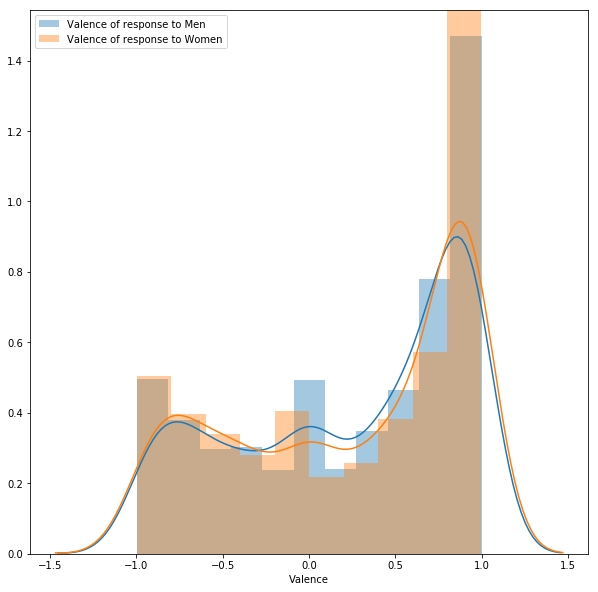

In [29]:
M_Valence=Resampled_df[Resampled_df.Gender=='M'].Valence
F_Valence=Resampled_df[Resampled_df.Gender=='F'].Valence

print(np.mean(M_Valence),np.std(M_Valence))
print(np.mean(F_Valence),np.std(F_Valence))

print(st.ttest_ind(M_Valence,F_Valence))


plt.figure(figsize=(10,10))
sns.distplot(M_Valence,label="Valence of response to Men")
sns.distplot(F_Valence,label="Valence of response to Women")
plt.legend()
plt.show() 

#The null hypothesis cannot be rejected: it appears that the negative/positive reponse to men or women is very similar.

In [30]:
abuse_flag=[]
for comment in Resampled_df.Cleaned:
    if 'abusive' in comment: abuse_flag.append(1)
    elif 'abuse' in comment: abuse_flag.append(1)
    elif 'abuser' in comment: abuse_flag.append(1)
    elif 'abused' in comment: abuse_flag.append(1)
    elif 'abusing' in comment: abuse_flag.append(1)
    else: abuse_flag.append(0)
        
cheat_flag=[]
for comment in Resampled_df.Cleaned:
    if 'cheat' in comment: cheat_flag.append(1)
    elif 'cheater' in comment: cheat_flag.append(1)
    elif 'cheating' in comment: cheat_flag.append(1)
    elif 'cheated' in comment: cheat_flag.append(1)
    elif 'cheats' in comment: cheat_flag.append(1)
    else: cheat_flag.append(0)
print(sum(abuse_flag),sum(cheat_flag))

131 109


In [31]:
Resampled_df['cheat']=cheat_flag
Resampled_df['abuse']=abuse_flag
Resampled_df['flagsum']=Resampled_df['cheat']+Resampled_df['abuse']

Flag_df=Resampled_df[Resampled_df.flagsum==1]
Flag_df.head()

,Code,Response,Gender,Length,Cleaned,Valence,cheat,abuse,flagsum
5982,8vif0o,"I bet she's cheating, but not with your husban...",F,69,"[bet, cheating, husband, probably, assumes, hu...",-0.0289,1,0,1
3988,dab8yj,When he started saying *you* were the one bein...,F,74,"[started, saying, *you*, one, abusive, got, sc...",-0.9570,0,1,1
4684,ab7uyu,>He's very remorseful sometimes. Other times h...,F,143,"[remorseful, sometimes, times, tell, partially...",-0.9900,1,0,1
6873,5c4nlp,>Jim and I shared the same views that an open ...,F,117,"[jim, shared, views, open, relationship, never...",-0.9224,1,0,1
5275,4j1690,> some of them saying how glad he is that it's...,F,46,"[saying, glad, cheating, past, year, awesome, ...",-0.1012,1,0,1


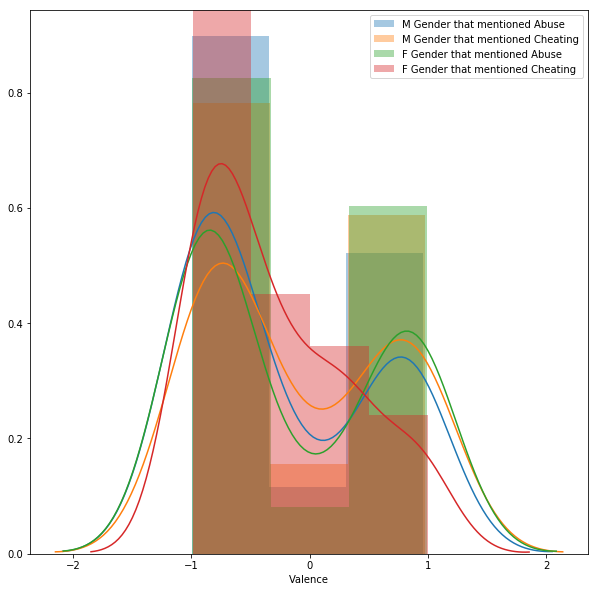

In [32]:
plt.figure(figsize=(10,10))
for gender in ['M','F']:
    for cheat_ in [0,1]:
        if cheat_==0: incident="Abuse"
        else: incident="Cheating"
        label=f"{gender} Gender that mentioned {incident}"
        sns.distplot(Flag_df[(Flag_df.Gender==gender) & (Flag_df.cheat==cheat_)].Valence,label=label)
plt.legend()
plt.show()

In [158]:
print(st.ttest_ind(Flag_df[Flag_df.cheat==1].Valence,Flag_df[Flag_df.abuse==1].Valence))

#It does not appear that Redditors respond differently to instances of abuse or cheating
#It is well known that their responses to everything are "break up" or "red flag."

#However, women mentioning cheating appears to get much more neutral responses than anything else,
#While women mentioning abuse gets far more positive responses.

Ttest_indResult(statistic=-1.1193049501591954, pvalue=0.26417257411908995)


In [165]:
Text_cheat=[]
Text_abuse=[]

for idx in Resampled_df.index:
    if Resampled_df['cheat'][idx]==1: Text_cheat+=Resampled_df['Cleaned'][idx]
    elif Resampled_df['abuse'][idx]==1: Text_abuse+=Resampled_df['Cleaned'][idx]
    
FreqDist_cheat=FreqDist(Text_cheat)
FreqDist_abuse=FreqDist(Text_abuse)

print("cheating","abuse")
for pair in zip([x[0] for x in FreqDist_cheat.most_common(20)],[x[0] for x in FreqDist_abuse.most_common(20)]):
    print(pair) #Showing top 20 most common response words by issue

cheating abuse
('cheating', 'like')
('would', 'would')
('like', 'abusive')
('relationship', 'get')
('get', 'abuse')
('someone', 'relationship')
('years', 'think')
('cheated', 'really')
('time', 'people')
('know', 'know')
('going', 'family')
('people', 'going')
('good', 'even')
('think', 'time')
('life', 'way')
('said', 'could')
('really', 'need')
('friends', "'ve")
('got', 'kids')
('things', 'help')
